In [1]:
import os
import openai
import dotenv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [ ]:
#Haciendo uso de openAI para clasificación
outputs_esp_eng = pd.read_csv('outputs_esp_eng.csv')
output_esp = outputs_esp_eng['output_esp'].values.tolist()
output_eng = outputs_esp_eng['output_eng'].values.tolist()

config = dotenv.dotenv_values(".env")
openai.api_key = config['OPENAI_API_KEY']

def openAI_classificator(role, text):
    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
        {
          "role": "system",
          "content": role
        },
        {
          "role": "user",
          "content": text
        }
      ],
      temperature=0,
      max_tokens=100,
      top_p=1,
      frequency_penalty=0,
      presence_penalty=0
    )

    return response['choices'][0]['message']['content']

role_esp = "Se te otorgará un tweet, y tu tarea será determinar si ese texto está 'fuertemente en contra', \
'en contra', 'neutral', 'a favor', o 'fuertemente a favor' de la candidatura de Donald Trump. Solo retorna la \
etiqueta. Si no tienes suficiente contexto, retorna 'Ninguna', por favor."

role_eng = "You will be given a tweet, and your task will be to determine if that text is 'strongly against',\
'against', 'neutral', 'in favor', or 'strongly in favor' of Donald Trump's candidacy. Just return the \
label. If you don't have enough context, return 'None', please."

labels_esp = ['fuertemente en contra', 'en contra', 'neutral', 'a favor', 'fuertemente a favor']
labels_eng = ['strongly against', 'against', 'neutral', 'in favor', 'strongly in favor']

histogram_eng = [0.0, 0.0, 0.0, 0.0, 0.0]
histogram_esp = [0.0, 0.0, 0.0, 0.0, 0.0]

results_eng = []
results_esp = []

for tweet in output_esp:
    resp = openAI_classificator(role_esp, tweet)
    index = labels_esp.index(resp)
    histogram_esp[index] += 1.0
    results_esp.append(tweet + ' ' + resp)

for tweet in output_eng:
    resp = openAI_classificator(role_eng, tweet)
    index = labels_eng.index(resp)
    histogram_eng[index] += 1.0
    results_eng.append(tweet + ' ' + resp)

histograms = pd.DataFrame(data = {'histogram_esp' : histogram_esp, 'histogram_eng': histogram_eng })
histograms.to_csv(path_or_buf='histograms_openAI.csv')

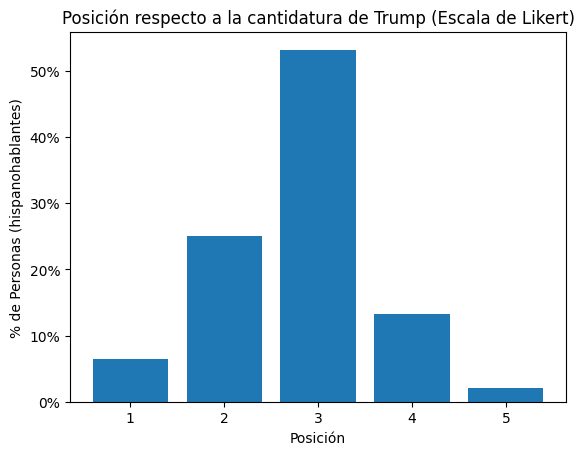

In [272]:
#Histograma de posiciones respecto a Trump de hispanohablantes
index = np.arange(len(histogram_esp)) 
labels = ['1', '2', '3', '4', '5']

plt.bar(index, histogram_esp) 
plt.title('Posición respecto a la cantidatura de Trump (Escala de Likert)')
plt.xlabel('Posición') 
plt.ylabel('% de Personas (hispanohablantes)') 
plt.xticks(index, labels)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1000))

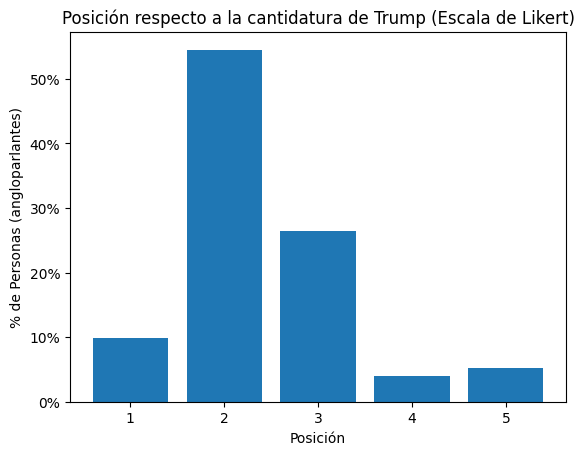

In [273]:
index = np.arange(len(histogram_eng)) 
labels = ['1', '2', '3', '4', '5']

plt.bar(index, histogram_eng) 
plt.title('Posición respecto a la cantidatura de Trump (Escala de Likert)')
plt.xlabel('Posición') 
plt.ylabel('% de Personas (angloparlantes)') 
plt.xticks(index, labels)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1000))